# Project: Investigate the factors that determine if a patient would meet on                                                      Medical Appointment

# Introduction:

# Data Wrangling

In [1]:
##importing libraries needed
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
#import dateutil.parser as dp
import datetime as dt

In [2]:
##dataset loading and assignment 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
##checking for duplicated rows
df.duplicated().sum()

0

In [4]:
##droping unimportant features
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [5]:
##changing columns frontstyle from uppercase to lowercase and dash to underscore
df.rename(columns = lambda x: x.strip().lower().replace('-', '_'), inplace = True)

In [6]:
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
##changing scheduledday and appointmentday from object data type to datatime64
df['scheduledday'] = df["scheduledday"].apply(lambda x:dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
df['appointmentday'] = df["appointmentday"].apply(lambda x:dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))


In [8]:
##Extrcating day, month and year from datetime
df['sch_day'] = df["scheduledday"].dt.day_name()
df['sch_month'] = df["scheduledday"].dt.month_name()
df['sch_year'] = df["scheduledday"].dt.year

df['app_day'] = df["appointmentday"].dt.day_name()
df['app_month'] = df["appointmentday"].dt.month_name()
df['app_year'] = df["appointmentday"].dt.year
df.head(5)


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,sch_day,sch_month,sch_year,app_day,app_month,app_year
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,2016,Friday,April,2016
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April,2016,Friday,April,2016


In [22]:
#import dateutil.parser as dp

#d = dp.parse('2016-04-29T00:00:00Z')
#print(d.strftime('%d/%m/%Y'))

In [9]:
##creating a new column; interval_day so to check if time interval is a factor that affect show up rate.
df['interval_day'] = df['appointmentday'].dt.date - df['scheduledday'].dt.date

In [10]:
#def dateformat(x):
 #   date_list = []
  #  for row in df[x]:
   #     date_list.append(dp.parse(row).strftime('%d/%m/%y'))
    #return pd.Series(date_list)

In [43]:
#df['appointmentday'] = dateformat('appointmentday')

In [45]:
#df['scheduledday'] = dateformat('scheduledday')

In [11]:
##dropping rows with age 0 and -1
df = df.query('age != 0 & age != -1')


In [12]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99], dtype=int64)

In [13]:
##grouping the age for easy analysis
def age_dist(df):
    if df.age > 70:
        return 'old age'
    elif df.age > 55:
        return 'late adult'
    elif df.age > 35:
        return 'middle age'
    elif df.age > 18:
        return 'young adult'
    elif df.age > 12:
        return 'adolescent'
    else:
        return 'childhood'

In [14]:
df['age'] = df.apply(age_dist, axis = 'columns')

In [15]:
df.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,sch_day,sch_month,sch_year,app_day,app_month,app_year,interval_day
0,F,2016-04-29 18:38:08,2016-04-29,late adult,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,2016,Friday,April,2016,0 days
1,M,2016-04-29 16:08:27,2016-04-29,late adult,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016,0 days
2,F,2016-04-29 16:19:04,2016-04-29,late adult,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016,0 days


In [16]:
##correcting and renaming some columns name with wrong spellings
df.rename(columns = {'hipertension': 'hypertension'}, inplace = True)
df.rename(columns = {'handcap': 'handicap'}, inplace = True)
df.rename(columns = {'neighbourhood': 'host_location'}, inplace = True)
df.head(3)

,gender,scheduledday,appointmentday,age,host_location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,sch_month,sch_year,app_day,app_month,app_year,interval_day
0,F,2016-04-29 18:38:08,2016-04-29,late adult,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,2016,Friday,April,2016,0 days
1,M,2016-04-29 16:08:27,2016-04-29,late adult,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016,0 days
2,F,2016-04-29 16:19:04,2016-04-29,late adult,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,2016,Friday,April,2016,0 days


# Exploratory Data Analysis

# Analysis Based Gender 

In [17]:
##checking for the number of male and female in the dataset
df.gender.value_counts()

F    70118
M    36869
Name: gender, dtype: int64

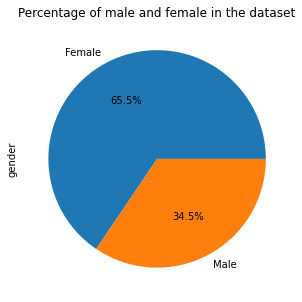

In [18]:
plt.title('Percentage of male and female in the dataset')
df.gender.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['Female', 'Male'], figsize = (5,5))
plt.show()

The chart shows female to male ratio of 2:1. That's there are more females in the dataset which I assumed to be outliners.


In [19]:
##Gender and No show Relationship
df.groupby('gender').no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  no_show
F       No         79.6%
        Yes        20.4%
M       No         79.9%
        Yes        20.1%
Name: no_show, dtype: object

<AxesSubplot:title={'center':'Gender and No Show Relationship'}, ylabel='no_show'>

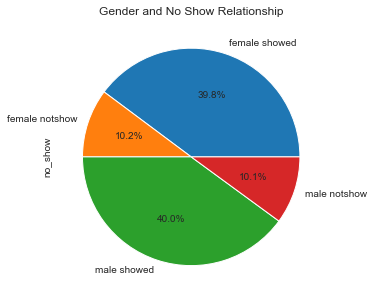

In [42]:
plt.title('Gender and No Show Relationship')
df.groupby('gender').no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                   figsize = (5, 5),
                                                                                   autopct = '%1.1f%%',
                                                                                  labels = ['female showed', 'female notshow', 'male showed', 'male notshow'])

<AxesSubplot:xlabel='gender,no_show'>

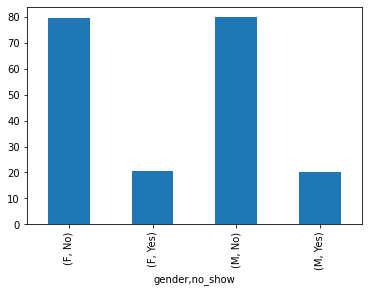

In [21]:
df.groupby('gender').no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'bar')

from the pictorial displays above, equal percentage of male and female showed up on the appointment day.
Though there are more female but it does have any effect on the responses to the appointment

In [22]:
##What effect does scholarship have on meeting up with the appointment
df.groupby(['gender', 'scholarship']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  scholarship  no_show
F       0            No         80.1%
                     Yes        19.9%
        1            No         76.2%
                     Yes        23.8%
M       0            No         80.1%
                     Yes        19.9%
        1            No         76.4%
                     Yes        23.6%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

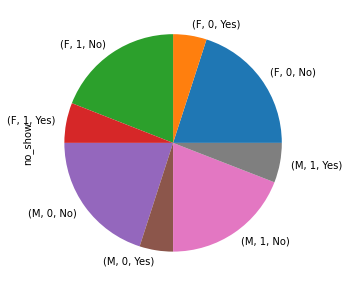

In [23]:
df.groupby(['gender', 'scholarship']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   figsize = (5, 5))
##format of the display: Gender, Scholarship, no show

There is same response of gender toward showing up on the appointment day.
Also, those without scholarship tend to show up on appointment day.

In [24]:
##What effect does hypertension have on meeting up with the appointment
df.groupby(['gender', 'hypertension']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  hypertension  no_show
F       0             No         78.8%
                      Yes        21.2%
        1             No         82.7%
                      Yes        17.3%
M       0             No         79.3%
                      Yes        20.7%
        1             No         82.7%
                      Yes        17.3%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

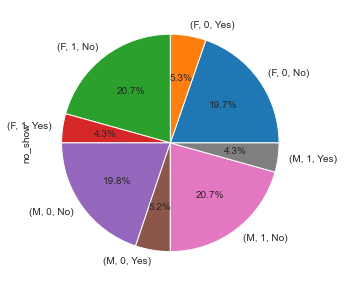

In [41]:
df.groupby(['gender', 'hypertension']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                     autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))
##format of the display: Gender, hypertension, no show

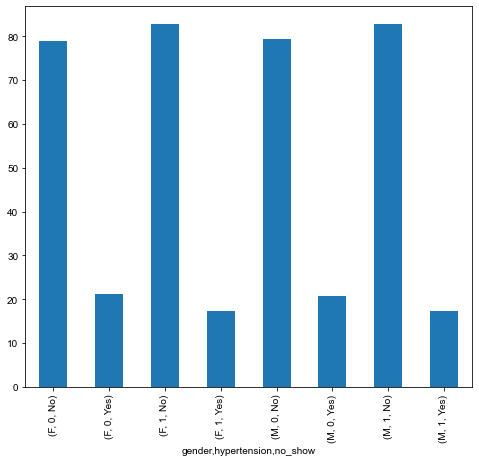

In [26]:
df.groupby(['gender', 'hypertension']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'bar',
                                                                                                   figsize = (8, 7))
sb.set_style('whitegrid')

from the displays above, those with hypertension tend to show up more on the appointment day.
followed by male without hypertension.

In [27]:
##What effect does diabetes have on meeting up with the appointment
df.groupby(['gender', 'diabetes']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  diabetes  no_show
F       0         No         79.4%
                  Yes        20.6%
        1         No         81.9%
                  Yes        18.1%
M       0         No         79.8%
                  Yes        20.2%
        1         No         82.3%
                  Yes        17.7%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

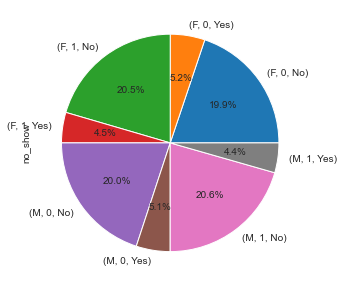

In [40]:
df.groupby(['gender', 'diabetes']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                 autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))
##format of the display: Gender, diabetes, no show

from the display above, male with diabetes tends to show up more on the appointment day.
Even among those without diabetes, male gender still shows greater possibility of showing up on the appointment day.

In [29]:
##What effect does alcoholism have on meeting up with the appointment
df.groupby(['gender', 'alcoholism']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  alcoholism  no_show
F       0           No         79.7%
                    Yes        20.3%
        1           No         74.8%
                    Yes        25.2%
M       0           No         79.7%
                    Yes        20.3%
        1           No         82.7%
                    Yes        17.3%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

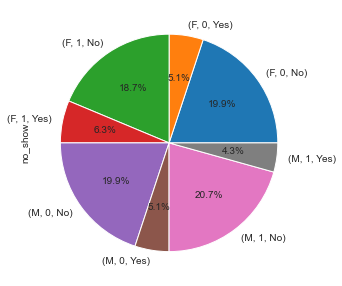

In [38]:
df.groupby(['gender', 'alcoholism']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))
##format of the display: Gender, alcoholism, no show

wow! 
from the displays, male having alcoholism tend to show up more on the appointment. followed by those not having alcoholism.
Then female with alcoholism.

In [43]:
##What effect does handicap have on meeting up with the appointment
df.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  handicap  no_show
F       0         No          79.6%
                  Yes         20.4%
        1         No          81.6%
                  Yes         18.4%
        2         No          76.2%
                  Yes         23.8%
        3         No         100.0%
        4         Yes        100.0%
M       0         No          79.8%
                  Yes         20.2%
        1         No          82.7%
                  Yes         17.3%
        2         No          84.6%
                  Yes         15.4%
        3         No          70.0%
                  Yes         30.0%
        4         No         100.0%
Name: no_show, dtype: object

In [44]:
df.handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

<AxesSubplot:ylabel='no_show'>

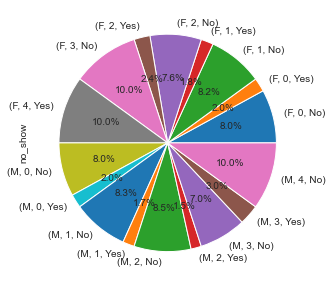

In [45]:

df.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))
##format of the display: Gender, handicap, no show

<AxesSubplot:xlabel='gender,handicap,no_show'>

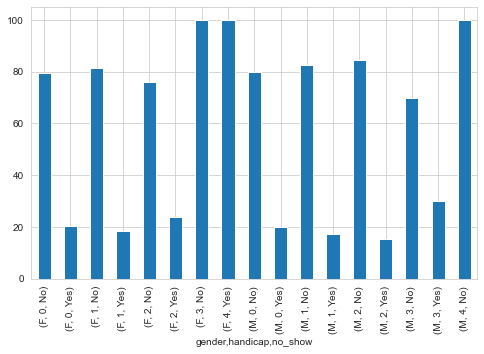

In [68]:
df.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'bar',
                                                                                                   
                                                                                                   figsize = (8, 5))
##format of the display: Gender, handicap, no show

from the display, male with 4 handicaps certainly would show up on the appointment day.


for easier analysis of handicap with respect with gender and no show
let's create a dataframe for handcap group; 0 -1 and 2 -3

<AxesSubplot:ylabel='no_show'>

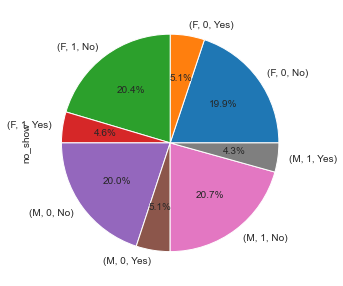

In [57]:
df_1 = df.query('handicap == 1 or handicap == 0')
df_1.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))
##format of the display: Gender, handicap, no show

In [60]:
df_1.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  handicap  no_show
F       0         No         79.6%
                  Yes        20.4%
        1         No         81.6%
                  Yes        18.4%
M       0         No         79.8%
                  Yes        20.2%
        1         No         82.7%
                  Yes        17.3%
Name: no_show, dtype: object

the display show that male with 1 handicap tend to show up on appointment day, followed by female with 1 handicap.
Then male without handicap.

<AxesSubplot:title={'center':'Representation of No Show based on zero to one Handicap diagnosis'}, ylabel='False'>

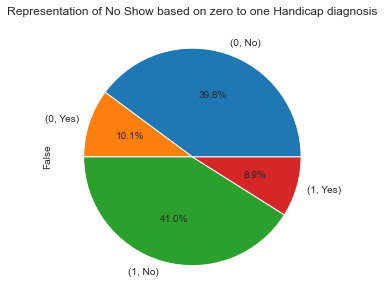

In [66]:
plt.title('Representation of No Show based on zero to one Handicap diagnosis')
df_1.groupby(['handicap']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5),
                                                                                        ylabel = False)
##format of the display: handicap, no show

In [86]:
#two handicap analysis
df_2.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  handicap  no_show
F       1         No         81.6%
                  Yes        18.4%
        2         No         76.2%
                  Yes        23.8%
M       1         No         82.7%
                  Yes        17.3%
        2         No         84.6%
                  Yes        15.4%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

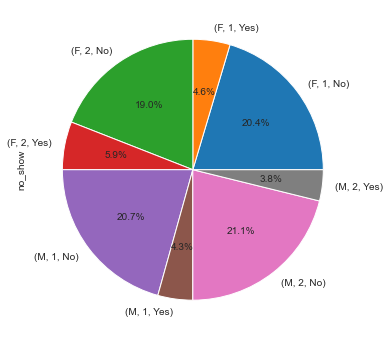

In [87]:
df_2 = df.query('handicap == 1 or handicap == 2')
df_2.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                  
                                                                                                  figsize = (6, 6))

<AxesSubplot:ylabel='no_show'>

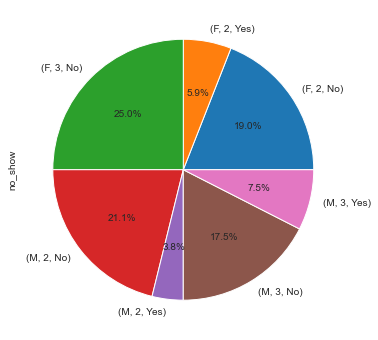

In [89]:
#three handicap analysis
df_3 = df.query('handicap == 2 or handicap == 3')
df_3.groupby(['gender', 'handicap']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                  
                                                                                                  figsize = (6, 6))

from the handicap analysis charts above, male with handicap zero(0) to two(2) tend to show up on the appointment day while female with handicap three (3) would show up on the appointment day 

In [90]:
##What effect does sms message have on meeting up with the appointment
df.groupby(['gender', 'sms_received']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

gender  sms_received  no_show
F       0             No         83.5%
                      Yes        16.5%
        1             No         72.2%
                      Yes        27.8%
M       0             No         82.9%
                      Yes        17.1%
        1             No         72.7%
                      Yes        27.3%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

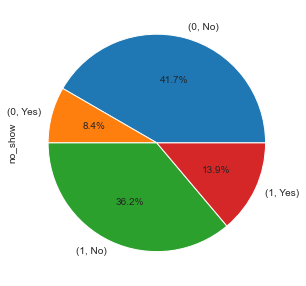

In [94]:
df_1.groupby(['sms_received']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))

In [91]:
##What effect does age have on meeting up with the appointment
df.groupby(['age']).no_show.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

age          no_show
adolescent   No         73.9%
             Yes        26.1%
childhood    No         79.0%
             Yes        21.0%
late adult   No         84.4%
             Yes        15.6%
middle age   No         80.3%
             Yes        19.7%
old age      No         84.2%
             Yes        15.8%
young adult  No         76.2%
             Yes        23.8%
Name: no_show, dtype: object

<AxesSubplot:ylabel='no_show'>

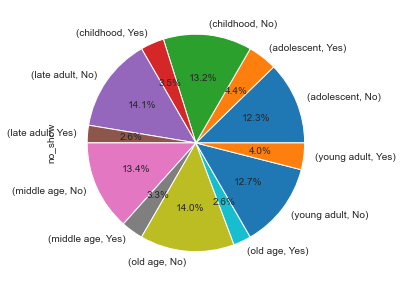

In [95]:
df_1.groupby(['age']).no_show.value_counts(normalize = True).mul(100).round(1).plot(kind = 'pie',
                                                                                                   autopct = '%1.1f%%',
                                                                                                   figsize = (5, 5))

# Conclusion